# BostonAirbnb Exploratry Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Read in excel file data
df = pd.read_csv('airbnb.csv', low_memory=False)

In [4]:
print(df.shape)
print(df.columns.tolist())

(61280, 107)
['Unnamed: 0', 'access', 'accommodates', 'amenities', 'availability_30', 'availability_365', 'availability_60', 'availability_90', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped', 'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee', 'country', 'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review', 'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 'interac

We start off with 61280 listings and 107 features for each of the listings.

### Data Cleaning (Remove Unnecessary Symbols)

In [5]:
# Remove the dollar signs in the 'extra_people' column
df['extra_people'] = df['extra_people'].astype(str)
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['extra_people'] = df['extra_people'].astype(float)

# Remove the dollar signs and commas in the 'price' column
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

# Remove the dollar signs and commas in the 'security_deposit' column
df['security_deposit'] = df['security_deposit'].astype(str)
df['security_deposit'] = df['security_deposit'].str.replace('$', '')
df['security_deposit'] = df['security_deposit'].str.replace(',', '')
df['security_deposit'] = df['security_deposit'].astype(float)

# Remove the dollar signs in the 'cleaning_fee' column
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

### Data Cleaning (Replace NaN Values)

In [6]:
# Replace all the NaN values in "review_scores_rating" with the mean value
mean_review_scores_rating = np.nanmean(df["review_scores_rating"])
df["review_scores_rating"].fillna(value=mean_review_scores_rating, inplace=True)

# Replace all the NaN values in "bathrooms" to the mean value
mean_bathrooms = np.nanmean(df["bathrooms"])
df["bathrooms"].fillna(value=mean_bathrooms, inplace=True)

# Replace all the NaN values in "bedrooms" to the mean value
mean_bedrooms = np.nanmean(df["bedrooms"])
df["bedrooms"].fillna(value=mean_bedrooms, inplace=True)

# Replace all the NaN values in "beds" to the mean"
mean_beds = np.nanmean(df["beds"])
df["beds"].fillna(value=mean_beds, inplace=True)

# Replace all the NaN values in "security_deposit" with the mean
mean_security_deposit = np.nanmean(df["security_deposit"])
df["security_deposit"].fillna(value=mean_security_deposit, inplace=True)

# Replace all the NaN values in "cleaning_fee" with the mean
mean_cleaning_fee = np.nanmean(df["cleaning_fee"])
df["cleaning_fee"].fillna(value=mean_cleaning_fee, inplace=True)

## Summary Statistics and Visualizations

### Average Price for each Neighborhood

In [7]:
# Determine average price of an Airbnb
avg_price = np.mean(df["price"])

print(avg_price)

187.71483355091385


The average price of an Airbnb in Boston is $187.71

### Maximum Listing Price

In [8]:
# Determine the most expensive Airbnb listing in Boston
max_price = np.max(df["price"])

print(max_price)

5000.0


 Most expensive Airbnb listing in Boston is $5000.

### Minimum Listing Price

In [9]:
# Determine the cheapest Airbnb listing
min_price = np.min(df["price"])

print(min_price)

0.0


The cheapest Airbnb listing in Boston is $0. This is an outlier for sure, probably shouldn't be inTtraining of the model.

### Average Price by Neighborhood

Average prices by neighborhood

East Boston: $126
Roxbury: $180
Roslindale: $90
Downtown: $266
Mission Hill: $208
South End: $211
Back Bay: $267
Fenway: $225
Allston: $142
North End: $200
Dorchester: $122
Beacon Hill: $193
West End: $236
Jamaica Plain: $145
Charlestown: $216
Brighton: $116
South Boston: $235
West Roxbury: $118
Bay Village: $224
Chinatown: $241
Longwood Medical Area: $142
Hyde Park: $80
South Boston Waterfront: $295
Mattapan: $84
Leather District: $565
Harbor Islands: $200


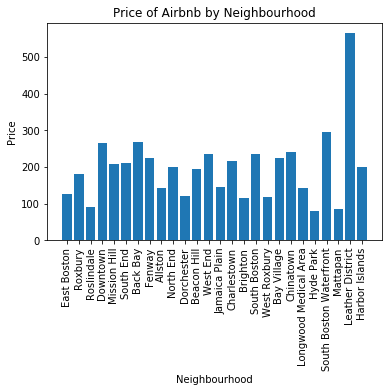

In [10]:
# Determine most expensive neighborhood on average
neighbourhoods = df['neighbourhood_cleansed'].unique()
avg_neigh_prices = np.zeros(len(neighbourhoods))

for neighbourhood in range(len(neighbourhoods)):
    list_of_neigh_price = df.loc[df['neighbourhood_cleansed'] == neighbourhoods[neighbourhood], 'price']
    avg_price_single_neigh = np.mean(list_of_neigh_price)
    avg_neigh_prices[neighbourhood] = avg_price_single_neigh
    
print("Average prices by neighborhood\n")

for i in range(len(neighbourhoods)):
    print(neighbourhoods[i] + ": ${:0.0f}".format(avg_neigh_prices[i]))
    
    
inds = neighbourhoods
fig, ax = plt.subplots()
rects = ax.bar(inds, avg_neigh_prices)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel('Price')
ax.set_title('Price of Airbnb by Neighbourhood')
plt.xticks(rotation='vertical')
plt.show()

Most expensive neighborhood for Airbnb's Boston lisitn is: Leather District.

### Most Common Neighborhoods

Dorchester                 5247
Jamaica Plain              5078
Back Bay                   4830
Fenway                     4666
South End                  4278
Downtown                   3964
Allston                    3868
Brighton                   3767
South Boston               3309
Roxbury                    3126
East Boston                3011
Beacon Hill                2567
North End                  2392
Mission Hill               2235
Charlestown                1711
Chinatown                  1664
West End                   1421
Roslindale                 1163
West Roxbury                656
South Boston Waterfront     609
Hyde Park                   598
Mattapan                    597
Bay Village                 296
Longwood Medical Area       151
Leather District             74
Harbor Islands                2
Name: neighbourhood_cleansed, dtype: int64


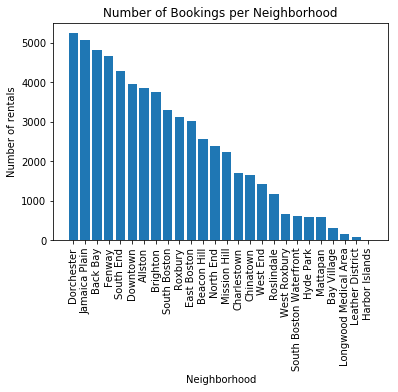

In [11]:
# Find the most common neighborhoods.
neighbourhoodCounts = df["neighbourhood_cleansed"].value_counts()

print(neighbourhoodCounts)

# Small workaround here since the indexing was weird in the provided data structure
neighbourhoods = np.asarray(neighbourhoodCounts.axes)[0]
counts = neighbourhoodCounts.values

fig, ax = plt.subplots()
rects = ax.bar(neighbourhoods, counts)
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of rentals")
ax.set_title("Number of Bookings per Neighborhood")
plt.xticks(rotation='vertical')
plt.show()

The 3 most popular areas to book in Boston are Dorchester, Jamaica Plain, Back Bay.

## Distribution of Types of Rooms

(-1.1095682057660095,
 1.1168897946611167,
 -1.1136991416734563,
 1.1006523407132986)

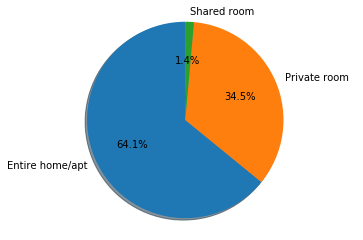

In [12]:
num_entire = np.where(df["room_type"] == "Entire home/apt")[0].size
num_private = np.where(df["room_type"] == "Private room")[0].size
num_shared = np.where(df["room_type"] == "Shared room")[0].size

labels = 'Entire home/apt', 'Private room', 'Shared room'
sizes = [num_entire, num_private, num_shared]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

## Distribution of Cancellation Policy

In [13]:
print(df["cancellation_policy"].unique())
print(df["cancellation_policy"].value_counts())

['super_strict_30' 'strict' 'moderate' 'strict_14_with_grace_period'
 'flexible' 'super_strict_60']
strict_14_with_grace_period    27749
moderate                       15120
flexible                       14041
strict                          3470
super_strict_30                  840
super_strict_60                   60
Name: cancellation_policy, dtype: int64


(-1.1300611591122807,
 1.128170758164281,
 -1.1298015868433566,
 1.101419123183017)

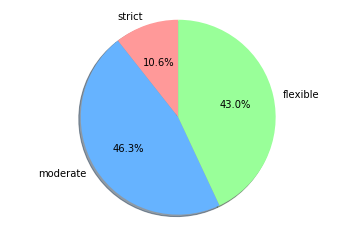

In [14]:
num_strict = np.where(df["cancellation_policy"] == "strict")[0].size
num_moderate = np.where(df["cancellation_policy"] == "moderate")[0].size
num_flexible = np.where(df["cancellation_policy"] == "flexible")[0].size

labels = 'strict', 'moderate', 'flexible'
sizes = [num_strict, num_moderate, num_flexible]

# color scheme from https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax.axis('equal')

## Scatterplot of Price vs Number of Reviews

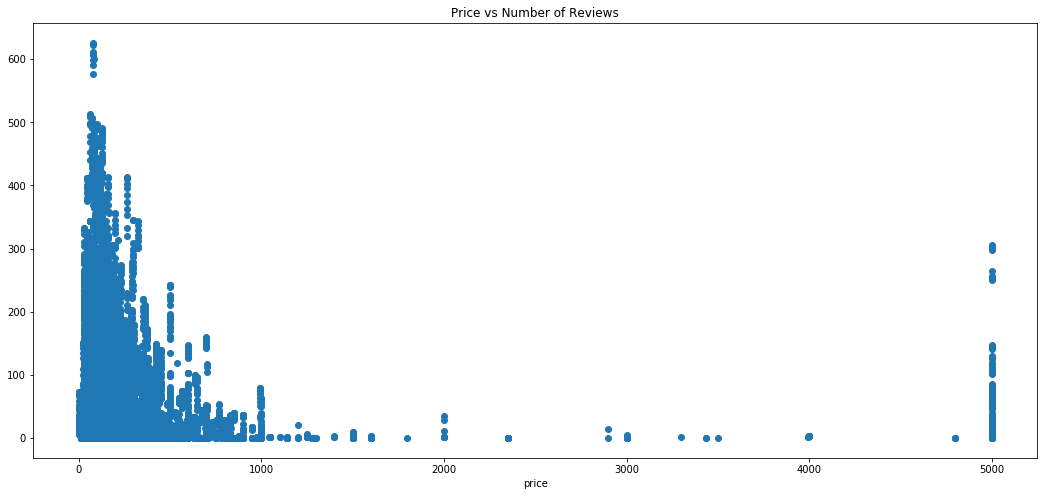

In [15]:
df.plot(x="price", y="number_of_reviews", style="o", figsize=(18,8), legend=False, title="Price vs Number of Reviews")

The Airbnb is more popular for price range $0 to $400. Listing with $0 price listing could be outliers

### Data Cleaning (Removing Unnecessary Features)

In [16]:
# Drop features that I believe to be irrelevant

df = df.drop(columns=['Unnamed: 0', 'access', 'availability_30', 'availability_365', 'availability_60', 
'availability_90','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
'calendar_last_scraped', 'calendar_updated', 'city','country', 'country_code',  'experiences_offered', 
'first_review', 'has_availability', 'host_about', 'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
'host_identity_verified', 'host_is_superhost', 'host_listings_count', 'host_location', 'host_name', 
'host_neighbourhood', 'host_picture_url', 'host_response_rate', 'host_response_time', 'host_since', 
'host_thumbnail_url', 'host_total_listings_count', 'host_url', 'host_verifications', 'house_rules', 'id', 
'instant_bookable', 'interaction', 'is_location_exact', 'jurisdiction_names', 'last_review', 'last_scraped',
'latitude', 'license', 'listing_url', 'longitude', 'market', 'maximum_maximum_nights', 'maximum_minimum_nights', 
'maximum_nights', 'maximum_nights_avg_ntm', 'medium_url', 'minimum_maximum_nights', 'minimum_minimum_nights',
'minimum_nights_avg_ntm', 'monthly_price', 'neighbourhood', 'neighbourhood_group_cleansed', 'notes', 
'number_of_reviews_ltm', 'picture_url','property_type', 'require_guest_phone_verification', 
'require_guest_profile_picture', 'requires_license', 'review_scores_accuracy', 'review_scores_checkin',
'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location','review_scores_value',
                      
'reviews_per_month','scrape_id','smart_location',  'square_feet', 'state', 'street', 'thumbnail_url', 
'transit', 'weekly_price', 'xl_picture_url', 'zipcode'])


# Convert categorical data to numerical data using one-hot encoding
df = pd.get_dummies(df, columns=["bed_type"])
df = pd.get_dummies(df, columns=["room_type"])
df = pd.get_dummies(df, columns=["neighbourhood_cleansed"])
df = pd.get_dummies(df, columns=["is_business_travel_ready"])
df = pd.get_dummies(df, columns=["cancellation_policy"])

We have gone from starting with 96 features to 23 features. The features that I will be using are:
- name
- summary
- space
- description
- neighborhood_overview
- amenities

- neighbourhood_cleansed
- room_type
- bed_type
- is_business_travel_ready
- cancellation_policy

- accommodates
- bathrooms
- bedrooms
- beds
- price
- security_deposit
- cleaning_fee
- guests_included
- extra_people
- minimum_nights
- number_of_reviews
- review_scores_rating

### Normalize Numerical Data

In [17]:
df_numeric = df[["accommodates", "bathrooms", "bedrooms", "beds", "price", "security_deposit", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "number_of_reviews", "review_scores_rating"]]

# Convert to a matrix in order to use sklearn's normalize
df_numeric_matrix = df_numeric.as_matrix()

# Normalize with sklearn's normalize
matrix_numeric_normalized = normalize(X=df_numeric_matrix, norm='l2')

# Convert back to a Pandas Dataframe
df_numeric_normalized = pd.DataFrame(matrix_numeric_normalized)

# Replace the non-normalized numerical features with normalized features
df[["accommodates", "bathrooms", "bedrooms", "beds", "price", "security_deposit", "cleaning_fee",
    "guests_included", "extra_people", "minimum_nights", "number_of_reviews",
    "review_scores_rating"]] = df_numeric_normalized

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
# Split dataset into 60-training set 20-validation set and 20-test set approximately
# Let's try to do regression without the bag of words / summary features first
dfY = df["price"]
dfX = df.drop(["price", "name", "summary", "space", "description", "neighborhood_overview", "amenities"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

### Least Squares Linear Regression

In [19]:
# Let's try to do regression without the bag of words / summary features first

# Least squares regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_y_pred = linear_model.predict(X_val)
linear_val_err = np.sum((linear_y_pred - y_val)**2)


In [132]:
print(linear_val_err)
print(linear_model.score(X_test,y_test))

109.6809560195898
0.787345846578595


Validation error for linear regression is 109.68 accuracy is 78%

### Least Squares Linear Regression with L2 Regularization (Ridge Regression)

In [21]:
ridge_avg_val_err = 0

for i in np.arange(1,11):
    ridge_model = Ridge(alpha=i)
    ridge_model.fit(X_train, y_train)
    
    ridge_y_pred = ridge_model.predict(X_val)
    ridge_val_err = np.sum((ridge_y_pred - y_val)**2)
    ridge_avg_val_err += ridge_val_err
    
ridge_avg_val_err = ridge_avg_val_err / len(np.arange(1,11))

In [131]:
print(ridge_avg_val_err)
print(ridge_model.score(X_test,y_test))

112.83069431518126
0.7808210944314713


Validation error using different regularization strengths is 112.83

### Multi-Layer Perceptron Regression

In [26]:
mlp_avg_val_err = 0

for i in np.arange(1,11):
    mlp_model = MLPRegressor(hidden_layer_sizes=(24, 12), activation='relu', learning_rate='adaptive')
    mlp_model.fit(X_train, y_train)

    mlp_y_pred = mlp_model.predict(X_val)
    mlp_val_err = np.sum((mlp_y_pred - y_val)**2)
    mlp_avg_val_err += mlp_val_err

mlp_avg_val_err /= len(np.arange(1,11))

In [130]:
print(mlp_avg_val_err)
print(mlp_model.score(X_test,y_test))

11.153755024978311
0.9765554488892796


Validation error using two hidden layer of sizes 24 and 12 is 12.30. The accuracy is 97.65%

### Random Forest Regression

In [28]:
rf_avg_val_err = 0

for i in range(1,11):
    rf_model = RandomForestRegressor(n_estimators=15, criterion='mse', bootstrap=True)
    rf_model.fit(X_train, y_train)
    
    rf_y_pred = rf_model.predict(X_val)
    rf_val_err = np.sum((rf_y_pred - y_val)**2)
    rf_avg_val_err += rf_val_err
    
rf_avg_val_err /= len(np.arange(1,11))

In [129]:
print(rf_avg_val_err)
print(rf_model.score(X_test,y_test))

2.023915805900082
0.9957167758387675


Validation error using random forest regression with 15 trees is 2.04 The accuracy is 99.57%


# KNN Regression

In [140]:
neigh_avg_val_err = 0
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train) 
#kneighbors_graph([X_train, 20, 'distance'])
neigh_y_pred = rf_model.predict(X_val)
neigh_val_err = np.sum((neigh_y_pred - y_val)**2)
neigh_avg_val_err += rf_val_err
    
neigh_avg_val_err /= len(np.arange(1,11))

In [141]:
print(neigh_avg_val_err)
print(neigh.score(X_test, y_test))

0.20622722418322245
0.9104355253933691


Overall, the best model found was using the KNN Regression resulting in a validation error of 0.206 averaged over all models. 

### Feature Selection

Selecting top 5 features that help predict listing price.

In [142]:
# We will use recursive feature elimination for feature selection with the "last" Random Forest model
selector = RFE(estimator=rf_model, n_features_to_select=5, step=2)
selector = selector.fit(X_train, y_train)
print(selector.support_)

[False False False False  True False False False  True  True  True False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [147]:
df.head().transpose()

,0,1,2,3,4
accommodates,0.0111919,0.0107324,0.0135471,0.0149208,0.00196004
amenities,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
bathrooms,0.00559594,0.00536619,0.00338678,0.0074604,0.000980018
bedrooms,0.00559594,0.00536619,0.00338678,0.0074604,0.000980018
beds,0.00559594,0.00536619,0.00677356,0.0074604,0.000980018
cleaning_fee,0.419696,0.214648,0.237075,0,0.147003
description,Fully separate apartment in a two apartment bu...,This is a private guest room with private bath...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,Come stay with me in Boston's Roslindale neigh...,"Bright, 1 bed with curved glass windows facing..."
extra_people,0,0,0.0270942,0.149208,0
guests_included,0.0111919,0.00536619,0.00677356,0.0074604,0.000980018
minimum_nights,0.167878,0.0160986,0.0101603,0.0223812,0.0137203


From the dataset, we see that top 5 predictive features are:
- security_deposit
- cleaning_fee
- extra_people
- number_of_reviews
- review_scores_rating